<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/Image_Classifier_Class_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [3]:
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
First, we need to load a dataset. We will use Fashion MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.
### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels. Moreover, the pixel intensities are represented as integers (from 0 to 255). Let’s take a look at the shape and data type of the training set:

In [5]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

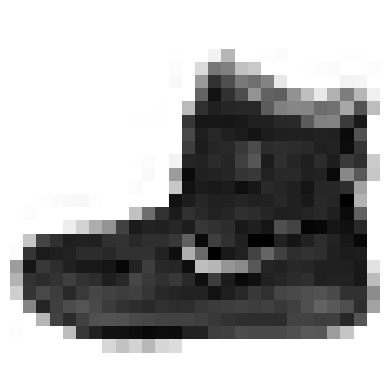

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [11]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

### Creating the model using the Sequential API
Now let’s build the neural network! Here is a classification MLP with two hidden layers:

First, set TensorFlow’s random seed to make the results reproducible: the random weights of the hidden layers and the output layer will be the same every time you run the notebook.

• In the next line create a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the sequential API.

• Next, build the first layer (an Input layer) and add it to the model. Specify the input shape, which doesn’t include the batch size, only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.

• Then add a Flatten layer. Its role is to convert each input image into a 1D array: for example, if it receives a batch of shape [32, 28, 28], it will reshape it to [32, 784]. This layer doesn’t have any parameters; it’s just there to do some simple preprocessing.

• Next add a Dense hidden layer with 300 neurons. Use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).

• Then add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

• Finally, add a Dense output layer with 10 neurons (one per class), using the softmax activation function because the classes are exclusive.

In [12]:
# TASK 1 - create the model

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Use the model’s summary() method to display all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [13]:
# TASK 2 - display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

### Compiling the model
After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

Use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead.

If we were doing binary classification, then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, use "sgd" which means that we will train the model using stochastic gradient descent.

When using the SGD optimizer, it is important to tune the learning rate. Default learning rate is 0.01.

Finally, since this is a classifier, it’s useful to measure its accuracy during training and evaluation, which is why set metrics=["accuracy"].

In [14]:
# TASK 3 - compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Train the model

Now train the model using fit() method:
Pass the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). Also pass a validation set (this is optional).

Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set.

Shape errors are quite common, especially when getting started, so you should familiarize yourself with the error messages: try fitting a model with inputs and/or labels of the wrong shape, and see the errors you get. Similarly, try compiling the model with loss="categorical_crossentropy" instead of loss="sparse_categorical_crossentropy". Or you can remove the Flatten layer.

In [15]:
# TASK 4: Train the model using fit()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6777 - loss: 1.0212 - val_accuracy: 0.8272 - val_loss: 0.5032
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8252 - loss: 0.5064 - val_accuracy: 0.8406 - val_loss: 0.4496
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8436 - loss: 0.4533 - val_accuracy: 0.8472 - val_loss: 0.4269
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8536 - loss: 0.4236 - val_accuracy: 0.8504 - val_loss: 0.4099
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8605 - loss: 0.4020 - val_accuracy: 0.8536 - val_loss: 0.3975
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8661 - loss: 0.3849 - val_accuracy: 0.8574 - val_loss: 0.3871
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.3704 - val_accuracy: 0.8588 - val_loss: 0.3793
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8745 - loss: 0.3581 - 

At each epoch during training, Keras displays the number of mini-batches processed so far on the left side of the progress bar. The batch size is 32 by default, and since the training set has 55,000 images, the model goes through 1,719 batches per epoch: 1,718 of size 32, and 1 of size 24. After the progress bar, you can see the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set.

Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when calling the fit() method, to give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss.

### Using the model to make predictions

Use the model’s predict() method to make predictions on new instances.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.85      0.80      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.86      0.79      1000
       Dress       0.81      0.92      0.86      1000
        Coat       0.80      0.81      0.81      1000
      Sandal       0.86      0.99      0.92      1000
       Shirt       0.78      0.59      0.67      1000
     Sneaker       0.96      0.88      0.92      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



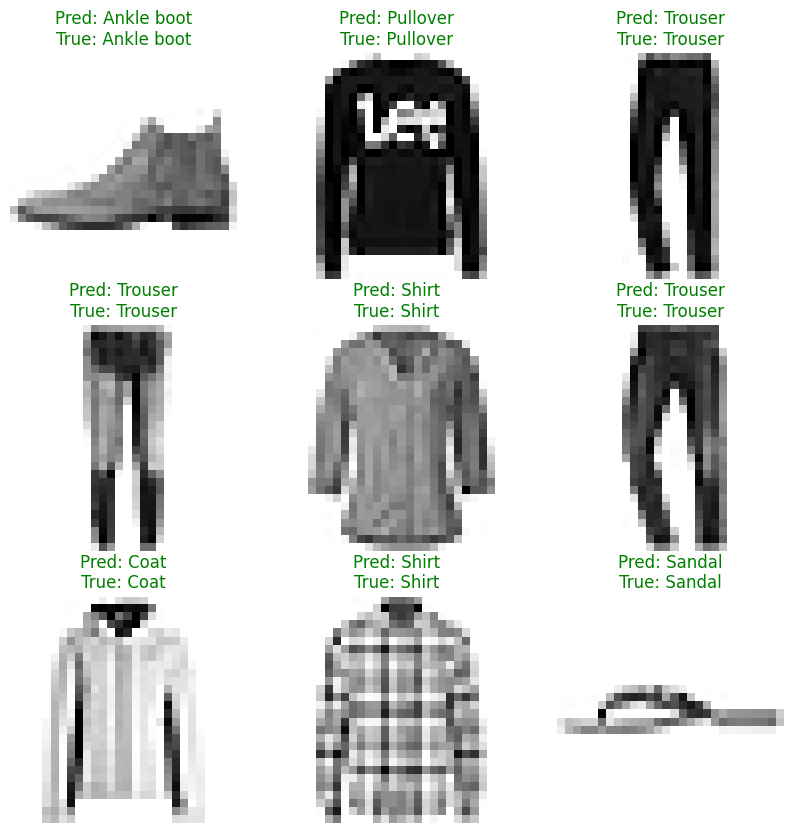

In [20]:
# TASK 5: Evaluate the model performance and display the accuracy on the training and testing sets
# you can also display the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=class_names))

conf_matrix = confusion_matrix(y_test, y_pred_classes)

num_images = 9
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap="binary")
    plt.axis('off')
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred_classes[i]]
    color = "green" if actual_label == predicted_label else "red"
    plt.title(f"Pred: {predicted_label}\nTrue: {actual_label}", color=color)

plt.show()